**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

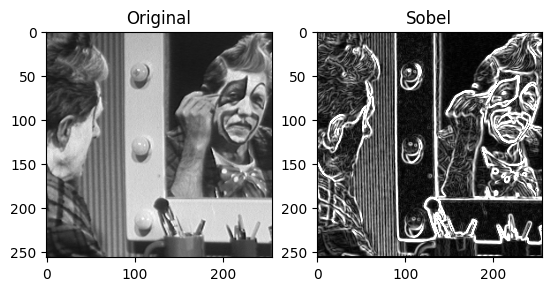

In [2]:
# code here

def convolve(neighborsBlock, kernelH1, kernelH2, kernelOrder):
    sumH1 = 0
    sumH2 = 0
    for i in range(0,kernelOrder):
        for j in range(0,kernelOrder):
            sumH1 = sumH1 + (neighborsBlock[i,j] * kernelH1[i,j])
            sumH2 = sumH2 + (neighborsBlock[i,j] * kernelH2[i,j])
    sobel = np.sqrt(
        np.power(sumH1,2)
       +
        np.power(sumH2,2))
    
    return np.abs(sobel)
        
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

imgH = img1.shape[0]
imgW = img1.shape[1]

imgSobel = np.zeros((imgW, imgH))
kernelH1 = np.matrix([[-1,-2,-1],
                      [ 0, 0, 0],
                      [ 1, 2, 1]])

kernelH2 = np.matrix([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]])

for i in range(1, imgH-1):
    for j in range(1,imgW-1):
        neighborsBlock = img1[i-1:i+2, j-1:j+2]
        imgSobel[i,j] = convolve(neighborsBlock,kernelH1, kernelH2, 3)


plt.subplot(1,2,2)
plt.title("Sobel")
plt.imshow(imgSobel, cmap='gray', vmin=0, vmax=255)

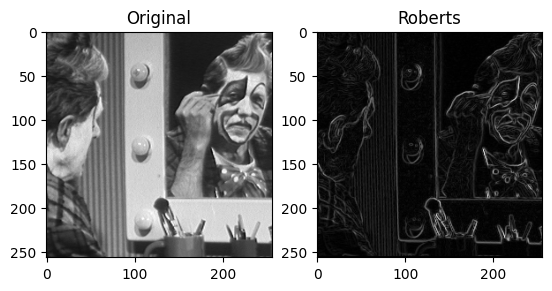

In [3]:
# Usando cruzado de robberts

img11 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img11, cmap='gray', vmin=0, vmax=255);

imgH = img11.shape[0]
imgW = img11.shape[1]

imgOut01 = np.zeros((imgW, imgH))
kernelH1 = np.matrix([[1,0],[0,-1]])
kernelH2 = np.matrix([[0,1],[-1,0]])
kernelOrder = 2

for i in range(1,imgH-1):
    for j in range(1,imgW-1):
        neighborsBlock = img11[i-1:i+1, j-1:j+1]
        imgOut01[i,j] = convolve(neighborsBlock, kernelH1, kernelH2, kernelOrder)

plt.subplot(1,2,2)
plt.title("Roberts")
plt.imshow(imgOut01, cmap='gray', vmin=0, vmax=255);

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

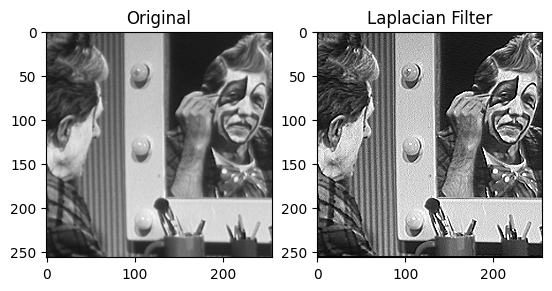

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def laplacian(pxBlock):
    x=1
    y=1
    lapl = -1*(pxBlock[x+1,y] + pxBlock[x-1,y] + pxBlock[x,y+1] + pxBlock[x,y-1]) + 4*pxBlock[x,y]
    
    return lapl

# a) usando filtro laplaciano

img2 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

img2H = img2.shape[0]
img2W = img2.shape[1]

img2Out = np.zeros((img2W, img2H))

k=1

for i in range(1,img2H-1):
    for j in range(1,img2W-1):
        neighborsBlock = img2[i-1:i+2, j-1:j+2].astype(float)
        img2Out[i,j] = img2[i,j] + k*laplacian(neighborsBlock)

plt.subplot(1,2,2)
plt.title("Laplacian Filter")
plt.imshow(img2Out, cmap='gray', vmin=0, vmax=255)

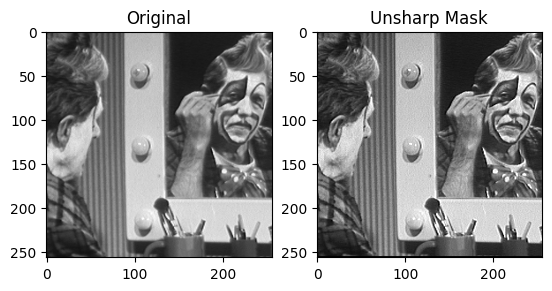

In [17]:
def suavizacaoPorMedia(pxBlock):
    blockSum = np.sum(pxBlock)
    return blockSum/9

# b) usando unsharp mask
img2v1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img2v1, cmap='gray', vmin=0, vmax=255)

img2v1H = img2v1.shape[0]
img2v1W = img2v1.shape[1]

img2v1Out = np.zeros((img2v1W, img2v1H))

k=1

for i in range(1,img2v1H-1):
    for j in range(1,img2v1W-1):
        neighborsBlock = img2v1[i-1:i+2, j-1:j+2]
        gmask = img2v1[i,j] - suavizacaoPorMedia(neighborsBlock)
        img2v1Out[i,j] = np.abs(img2v1[i,j] + k*gmask)

plt.subplot(1,2,2)
plt.title("Unsharp Mask")
plt.imshow(img2v1Out, cmap='gray', vmin=0, vmax=255)


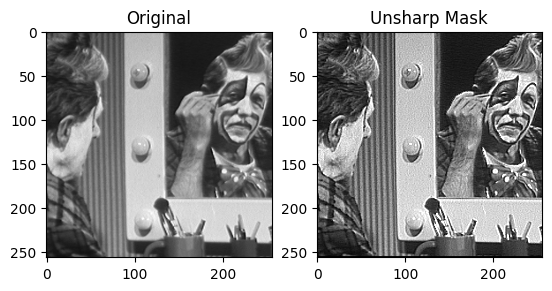

In [20]:
# c) usando highboost filtering

img2v2 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img2v2, cmap='gray', vmin=0, vmax=255)

img2v2H = img2v2.shape[0]
img2v2W = img2v2.shape[1]

img2v2Out = np.zeros((img2v2W, img2v2H))

k=3

for i in range(1,img2v2H-1):
    for j in range(1,img2v2W-1):
        neighborsBlock = img2v2[i-1:i+2, j-1:j+2]
        gmask = img2v2[i,j] - suavizacaoPorMedia(neighborsBlock)
        img2v2Out[i,j] = np.abs(img2v2[i,j] + k*gmask)

plt.subplot(1,2,2)
plt.title("Unsharp Mask")
plt.imshow(img2v2Out, cmap='gray', vmin=0, vmax=255)


3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

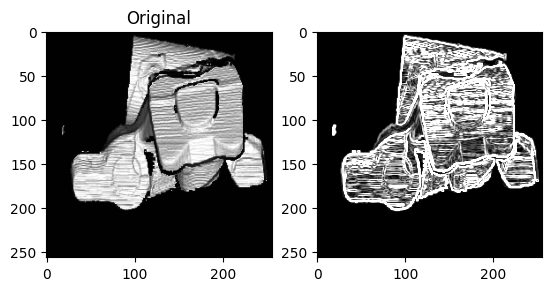

In [143]:
def convolve(neighborsBlock, kernelH1, kernelH2, kernelOrder):
    sumH1 = 0
    sumH2 = 0
    for i in range(0,kernelOrder):
        for j in range(0,kernelOrder):
            sumH1 = sumH1 + (neighborsBlock[i,j] * kernelH1[i,j])
            sumH2 = sumH2 + (neighborsBlock[i,j] * kernelH2[i,j])
    sobel = np.sqrt(
        np.power(sumH1,2)
       +
        np.power(sumH2,2))
    
    return np.abs(sobel)

img3 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img3, cmap='gray', vmin=0, vmax=255);

imgH = img3.shape[0]
imgW = img3.shape[1]

kernelH1 = np.matrix([[-1,-2,-1], [0,0,0], [1,2,1]])
kernelH2 = np.matrix([[-1,0,1], [-2,0,2], [-1,0,1]])

imgOut3 = np.zeros((imgH, imgW))

thr = 150
for i in range(1, imgH-1):
    for j in range(1,imgW-1):
        neighborsBlock = img3[i-1:i+2, j-1:j+2]
        imgOut3[i,j] = convolve(neighborsBlock,kernelH1, kernelH2, 3)

plt.subplot(1,2,2)
plt.title("")
plt.imshow(imgOut3, cmap='gray', vmin=0, vmax=255)

4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

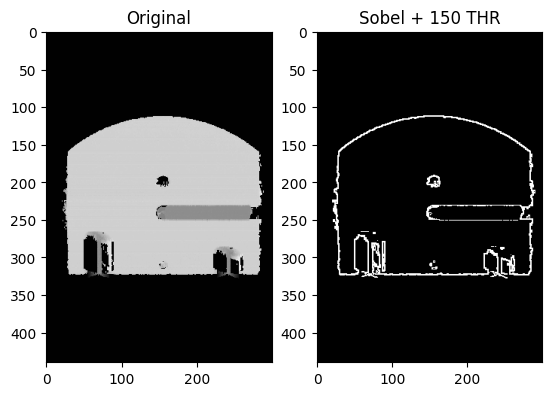

In [135]:
def convolve(neighborsBlock, kernelH1, kernelH2, kernelOrder):
    sumH1 = 0
    sumH2 = 0
    for i in range(0,kernelOrder):
        for j in range(0,kernelOrder):
            sumH1 = sumH1 + (neighborsBlock[i,j] * kernelH1[i,j])
            sumH2 = sumH2 + (neighborsBlock[i,j] * kernelH2[i,j])
    sobel = np.sqrt(
        np.power(sumH1,2)
       +
        np.power(sumH2,2))
    
    return np.abs(sobel)

img4 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img4, cmap='gray', vmin=0, vmax=255);

imgH = img4.shape[0]
imgW = img4.shape[1]

kernelH1 = np.matrix([[-1,-2,-1], [0,0,0], [1,2,1]])
kernelH2 = np.matrix([[-1,0,1], [-2,0,2], [-1,0,1]])

imgOut4 = np.zeros((imgH, imgW))

thr = 150
for i in range(1, imgH-1):
    for j in range(1,imgW-1):
        neighborsBlock = img4[i-1:i+2, j-1:j+2]
        newValue = convolve(neighborsBlock,kernelH1, kernelH2, 3)
        imgOut4[i,j] = 255 if (newValue > thr) else 0

plt.subplot(1,2,2)
plt.title("Sobel + 150 THR")
plt.imshow(imgOut4, cmap='gray', vmin=0, vmax=255)


5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

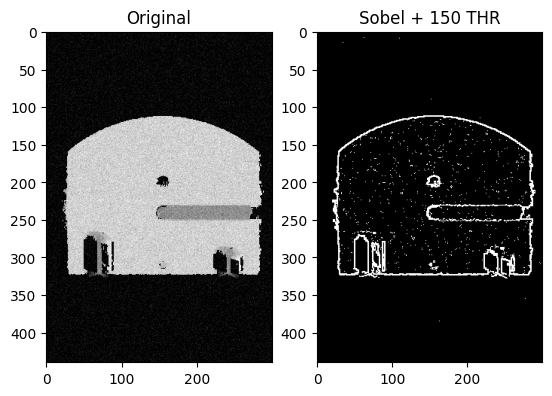

In [134]:
def convolve(neighborsBlock, kernelH1, kernelH2, kernelOrder):
    sumH1 = 0
    sumH2 = 0
    for i in range(0,kernelOrder):
        for j in range(0,kernelOrder):
            sumH1 = sumH1 + (neighborsBlock[i,j] * kernelH1[i,j])
            sumH2 = sumH2 + (neighborsBlock[i,j] * kernelH2[i,j])
    sobel = np.sqrt(
        np.power(sumH1,2)
       +
        np.power(sumH2,2))
    
    return np.abs(sobel)

img5 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img5, cmap='gray', vmin=0, vmax=255);

imgH = img5.shape[0]
imgW = img5.shape[1]

kernelH1 = np.matrix([[-1,-2,-1], [0,0,0], [1,2,1]])
kernelH2 = np.matrix([[-1,0,1], [-2,0,2], [-1,0,1]])

imgOut5 = np.zeros((imgH, imgW))

thr = 150
for i in range(1, imgH-1):
    for j in range(1,imgW-1):
        neighborsBlock = img5[i-1:i+2, j-1:j+2]
        newValue = convolve(neighborsBlock,kernelH1, kernelH2, 3)
        imgOut5[i,j] = 255 if (newValue > thr) else 0

plt.subplot(1,2,2)
plt.title("Sobel + 150 THR")
plt.imshow(imgOut5, cmap='gray', vmin=0, vmax=255)
